In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import cv2

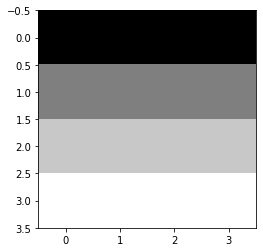

In [3]:
a = np.array([[0, 0, 0, 0],
             [127, 127, 127, 127],
             [200, 200, 200, 200],
             [255, 255, 255, 255]], dtype = 'uint8')
plt.imshow(a, cmap='gray')

[[  5   5   5   5]
 [132 132 132 132]
 [205 205 205 205]
 [  4   4   4   4]]


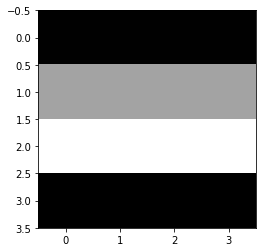

In [6]:
b = a + 5
plt.imshow(b, cmap='gray')
print(b) #255 + 5 = 300 4? > bit 단위 연산 결과

(4, 4, 3)


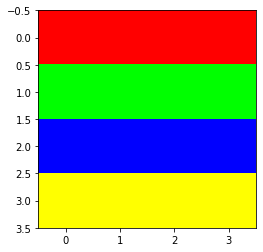

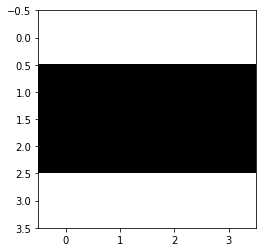

In [18]:
r = np.array([
    [255, 255, 255, 255],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [255, 255, 255, 255],
], dtype = 'uint8')

g = np.array([
    [0, 0, 0, 0],
    [255, 255, 255, 255],
    [0, 0, 0, 0],
    [255, 255, 255, 255],
], dtype = 'uint8')

b = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [255, 255, 255, 255],
    [0, 0, 0, 0],
], dtype = 'uint8')

colors = np.dstack([r, g, b]) #dstack = depth stack (d, h, v) 존재 depth, horizontal, vertical

print(colors.shape)

plt.imshow(colors)
plt.show() # 덮어쓰기 방지, 중간에 확인해야할때 필수적용
plt.imshow(r, cmap='gray')
plt.show()

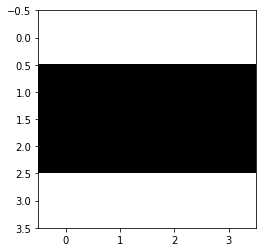

In [17]:
plt.imshow(r, cmap='gray') #색상 명시를 통해 원하는 형태 도출

In [32]:
z = np.zeros((4, 4), dtype='uint8')

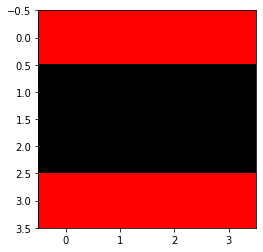

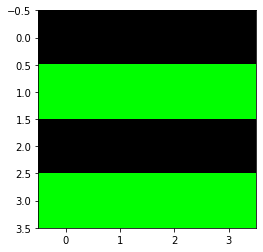

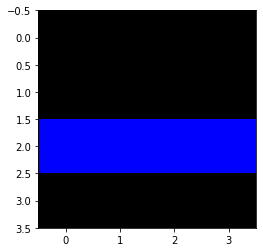

In [33]:
rr = np.dstack([r, z, z])
gg = np.dstack([z, g, z])
bb = np.dstack([z, z, b])

plt.imshow(rr)
plt.show()
plt.imshow(gg)
plt.show()
plt.imshow(bb)
plt.show()

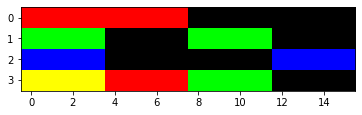

In [35]:
s_a = np.hstack([np.dstack([r, g, b]), rr, gg, bb])
plt.imshow(s_a)
plt.show()

<class 'numpy.ndarray'>
(750, 1200, 3)


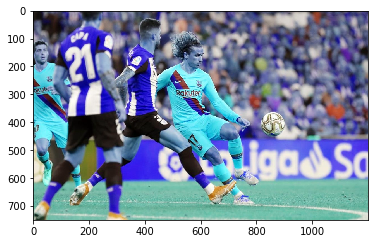

In [44]:
img = cv2.imread("barca_away.jpg")
print(type(img)) 
print(img.shape)
plt.imshow(img) #opencv는 RGB 순서가 아닌 BGR순서를 채용, 바로 적용할 시 색반전 일어남

In [45]:
b = img[:, :, 0] #blue color 채널
print(b.shape)

(750, 1200)


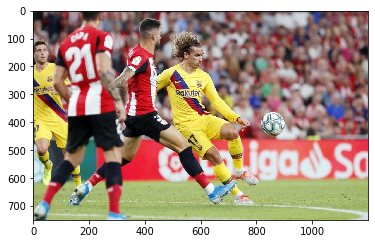

In [48]:
g = img[:, :, 1] #green color 채널
r = img[:, :, 2] #red color 채널
rgb = np.dstack([r, g, b])
plt.imshow(rgb)

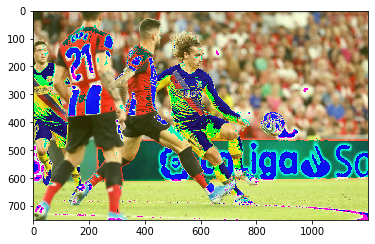

In [56]:
f_r = r + 40
f_g = g + 40
f_rgb = np.dstack([f_r, f_g, b])
plt.imshow(f_rgb) #255 를 넘어가는 값 존재(overflow 발생)

True

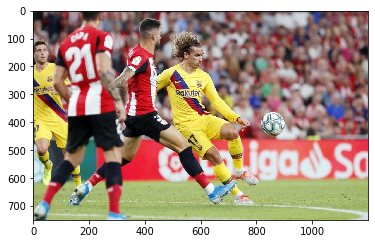

In [59]:
img = cv2.imread("barca_away.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #처리하는 과정에서 사용하지 않고 시각화하여 보여줄 때만 사용하는것이 일반적, BGR-RGB 순서 혼동 때문
plt.imshow(rgb)
cv2.imwrite("result.jpg", rgb) #BGR로 인식하기 때문에 색반전된 결과 출력됨, converting은 시각화 할때만 사용

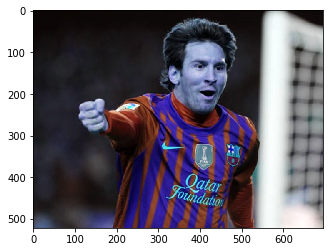

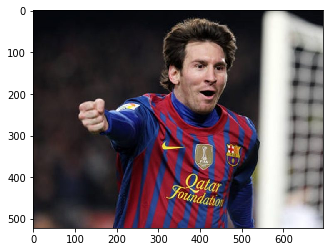

In [95]:
img = cv2.imread("messi.jpg")
plt.imshow(img)
plt.show()

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

result1 = img.copy()

for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        col = (int(img[r, c, 0]) + int(img[r, c, 1]) + int(img[r, c, 2])) / 3 #int로 확장 8비트 > 32비트
        result[r ,c, 0] = col
        result[r, c, 1] = col;
        result[r, c, 2] = col;

plt.imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
plt.show()

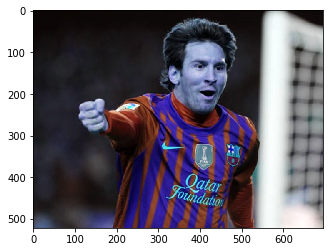

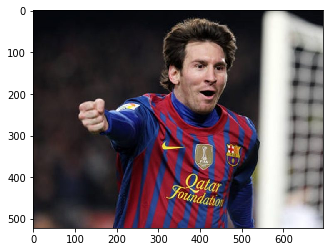

In [96]:
img = cv2.imread("messi.jpg")

plt.imshow(img)
plt.show()

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

result2 = img.copy()

for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        if h[r, c] >= 0 and h[r, c] <= 20:
            result[r ,c, 0] = img[r, c, 0]
            result[r, c, 1] = img[r, c, 1];
            result[r, c, 2] = img[r, c, 2];
        else:
            result[r ,c, 0] = 0
            result[r, c, 1] = 0;
            result[r, c, 2] = 0;

plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.show()

In [112]:
plt.figure(figsize=(30, 30))

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

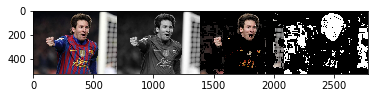

In [113]:
img = cv2.imread("messi.jpg")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

result1 = img.copy()
for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        col = (int(img[r, c, 0]) + int(img[r, c, 1]) + int(img[r, c, 2])) / 3
        result1[r ,c, 0] = col
        result1[r, c, 1] = col;
        result1[r, c, 2] = col;
        
result2 = img.copy()

for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        if h[r, c] >= 0 and h[r, c] <= 20:
            result2[r ,c, 0] = img[r, c, 0]
            result2[r, c, 1] = img[r, c, 1];
            result2[r, c, 2] = img[r, c, 2];
        else:
            result2[r ,c, 0] = 0
            result2[r, c, 1] = 0;
            result2[r, c, 2] = 0;
            
result3 = img.copy()

for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        if h[r, c] >= 0 and h[r, c] <= 20:
            result3[r ,c, 0] = 255
            result3[r, c, 1] = 255;
            result3[r, c, 2] = 255;
        else:
            result3[r ,c, 0] = 0
            result3[r, c, 1] = 0;
            result3[r, c, 2] = 0;

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)            
result1 = cv2.cvtColor(result1, cv2.COLOR_BGR2RGB)
result2 = cv2.cvtColor(result2, cv2.COLOR_BGR2RGB)
result3 = cv2.cvtColor(result3, cv2.COLOR_BGR2RGB)
messi_plus = np.hstack([rgb, result1, result2, result3])
plt.imshow(messi_plus)
plt.show()

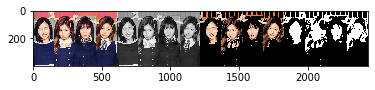

In [129]:
#코드 단순화 적용

img = cv2.imread("msmz.jpg")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

gray = img.copy()
skin = img.copy()
mask = img.copy()

for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        col = (int(img[r, c, 0]) + int(img[r, c, 1]) + int(img[r, c, 2])) / 3
        gray[r ,c, :] = col
        
for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        if h[r, c] >= 0 and h[r, c] <= 20:
            skin[r ,c, :] = img[r, c, :]
            mask[r ,c, :] = 255           
        else:
            skin[r ,c, :] = 0
            mask[r ,c, :] = 0
            
msmz_plus = np.hstack([img, gray, skin, mask])
plt.imshow(cv2.cvtColor(msmz_plus, cv2.COLOR_BGR2RGB))
plt.show()

(81, 104, 3)


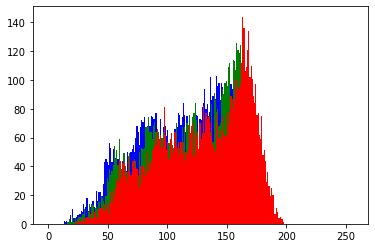

In [134]:
train = cv.imread("patch.png")
print(train.shape)

b, g, r = cv2.split(train) #효율적 RGB 분리 opencv 채널별 분리 함수

plt.hist(b.ravel(), 256, [0, 256], color='b'); #ravel() 2차원 행렬 1차원 벡터화
plt.hist(g.ravel(), 256, [0, 256], color='g');
plt.hist(r.ravel(), 256, [0, 256], color='r');

(81, 104, 3)


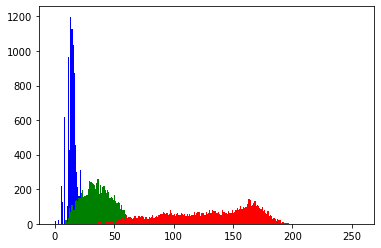

In [135]:
train = cv.imread("patch.png")
print(train.shape)

h, s, v = cv2.split(cv2.cvtColor(train, cv2.COLOR_BGR2HSV))

plt.hist(h.ravel(), 256, [0, 256], color='b'); 
plt.hist(s.ravel(), 256, [0, 256], color='g');
plt.hist(v.ravel(), 256, [0, 256], color='r');

(90, 106, 3)


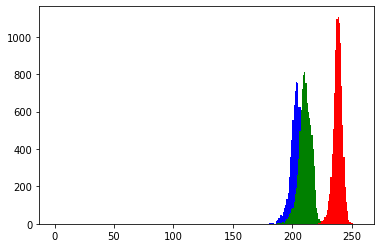

In [136]:
train = cv.imread("patch2.png")
print(train.shape)

b, g, r = cv2.split(train)

plt.hist(b.ravel(), 256, [0, 256], color='b');
plt.hist(g.ravel(), 256, [0, 256], color='g');
plt.hist(r.ravel(), 256, [0, 256], color='r');

(90, 106, 3)


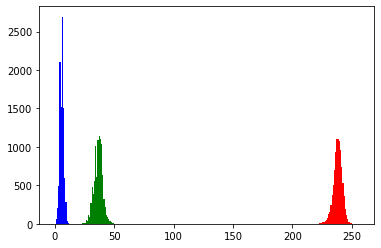

In [137]:
train = cv.imread("patch2.png")
print(train.shape)

h, s, v = cv2.split(cv2.cvtColor(train, cv2.COLOR_BGR2HSV))

plt.hist(h.ravel(), 256, [0, 256], color='b'); 
plt.hist(s.ravel(), 256, [0, 256], color='g');
plt.hist(v.ravel(), 256, [0, 256], color='r');

(331, 85, 3)


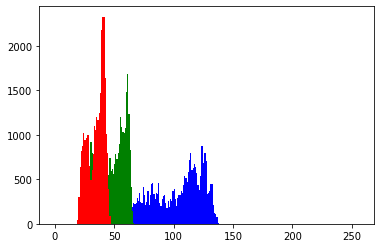

In [138]:
train = cv.imread("patch3.png")
print(train.shape)

b, g, r = cv2.split(train)

plt.hist(b.ravel(), 256, [0, 256], color='b');
plt.hist(g.ravel(), 256, [0, 256], color='g');
plt.hist(r.ravel(), 256, [0, 256], color='r');

(331, 85, 3)


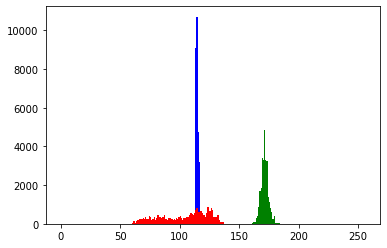

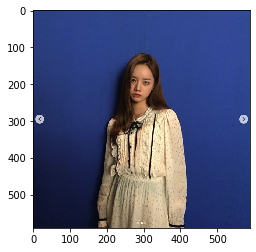

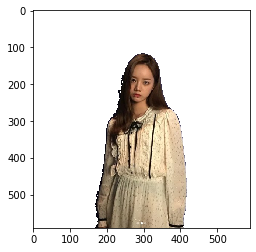

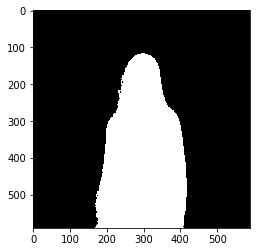

In [173]:
train = cv.imread("patch3.png")
print(train.shape)

h, s, v = cv2.split(cv2.cvtColor(train, cv2.COLOR_BGR2HSV))

h1 = plt.hist(h.ravel(), 256, [0, 256], color='b'); 
s1 = plt.hist(s.ravel(), 256, [0, 256], color='g');
v1 = plt.hist(v.ravel(), 256, [0, 256], color='r');

plt.show()

mode_h = (np.where(h1[0]==np.max(h1[0])))[0][0] #최빈색상값 도출
mode_s = (np.where(s1[0]==np.max(s1[0])))[0][0]
mode_v = (np.where(v1[0]==np.max(v1[0])))[0][0]

img = cv2.imread("hyeri.jpg")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

chroma = img.copy()
mask = img.copy()

min_h = mode_h - 10 # @ 값은 통계적으로 구하거나 임의로 설정 유의수준 하에 검증 확률기반 모델링
max_h = mode_h + 10

for r in range(img.shape[0]):
    for c in range(img.shape[1]):
        if h[r, c] >= min_h  and h[r, c] <= max_h:
            chroma[r ,c, :] = 255
            mask[r ,c, :] = 0           
        else:
            chroma[r ,c, :] = img[r, c, :]
            mask[r ,c, :] = 255
            
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(chroma, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()